# Table of contents
1. [Distortion](#distortion)
    1. [Types of Distortion](#Types of Distortion)
    2. [Distortion Coefficients and Correction](#Distortion Coefficients and Correction)
    3. [Finding Corners (Exercise)](#Finding Corners:Exercise)
    4. [Calibrating Camera (Exercise: Correcting for Distortion)](#Calibrating Camera)
2. [Lane Curvature](#Lane Curvature)

<img src='Figures/16. Intuitions.png' width=800>

# 1. Distortion <a name='distortion'></a>

Image distortion occurs when a camera looks at 3D objects in the real world and transforms them into a 2D image; this transformation isn’t perfect. Distortion actually changes what the shape and size of these 3D objects appear to be. So, the first step in analyzing camera images, is to undo this distortion so that you can get correct and useful information out of them.

__Quize: Why is it important to correct for image distortion?__

__Answers:__
- Distortion can change the apparent size of an object in an image.
- Distortion can change the apparent shape of an object in an image.
- Distortion can cause an object's appearance to change depending on where it is in the field of view.
- Distortion can make objects appear closer or farther away than they actually are.


### 1.1. Types of Distortion <a name='Types of Distortion'></a>

Real cameras use curved lenses to form an image, and light rays often bend a little too much or too little at the edges of these lenses. This creates an effect that distorts the edges of images, so that lines or objects appear more or less curved than they actually are. This is called __radial distortion__, and it’s the most common type of distortion.

Another type of distortion, is __tangential distortion__. This occurs when a camera’s lens is not aligned perfectly parallel to the imaging plane, where the camera film or sensor is. This makes an image look tilted so that some objects appear farther away or closer than they actually are.

### 1.2. Distortion Coefficients and Correction <a name='Distortion Coefficients and Correction'></a>

There are three coefficients needed to correct for __radial distortion__: $k1$, $k2$, and $k3$. To correct the appearance of radially distorted points in an image, one can use a correction formula.

In the following equations, $(x,y)$ is a point in a distorted image. To undistort these points, OpenCV calculates $r$, which is the known distance between a point in an undistorted (corrected) image $(x_{corrected},y_{corrected})$ and the center of the image distortion, which is often the center of that image $(x_c,y_c)$. This center point $(x_c,y_c)$ is sometimes referred to as the distortion center. These points are pictured below.

Note: The distortion coefficient $k3$ is required to accurately reflect _major_ radial distortion (like in wide angle lenses). However, for minor radial distortion, which most regular camera lenses have, k3 has a value close to or equal to zero and is negligible. So, in OpenCV, you can choose to ignore this coefficient; this is why it appears at the end of the distortion values array: $[k1, k2, p1, p2, k3]$. In this course, we will use it in all calibration calculations so that our calculations apply to a wider variety of lenses (wider, like wide angle, haha) and can correct for both minor and major radial distortion.

<img src='Figures/6. Pinhole Camera Model.png' width=500>

$$\text{Points in a distorted and undistorted (corrected) image.}$$

The point $(x, y)$ is a single point in a distorted image and $(x_{corrected}, y_{corrected})$ is where that point will appear in the undistorted (corrected) image.

<img src='Figures/6. Radial Distortion Correction.png' width=500>
$$ \text{Radial distortion correction.}$$

There are two more coefficients that account for tangential distortion: $p1$ and $p2$, and this distortion can be corrected using a different correction formula.

<img src='Figures/6. Tangential Distortion Correction.png' width=500>
$$\text{angential distortion correction.}$$

__Quiz: what is the fundamental difference between images formed with a pinhole camera and those formed using lenses?__

__Answer:__ Pinhole camera images are free from distortion, but lenses tend to introduce image distortion.

### 1.3. Finding Corners (Exercise) <a name='Finding Corners:Exercise'></a>

In this exercise, we'll use the OpenCV functions __findChessboardCorners()__ and __drawChessboardCorners()__ to automatically find and draw corners in an image of a chessboard pattern.

To learn more about both of those functions, we can have a look at the OpenCV documentation here: [cv2.findChessboardCorners()](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.findChessboardCorners) and [cv2.drawChessboardCorners()](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.drawChessboardCorners).

Applying these two functions to a sample image, you'll get a result like this:

<img src='Figures/9. corners-found3.jpg' width=500>

In the following exercise, our job is simple. Count the number of corners in any given row and enter that value in __nx__. Similarly, count the number of corners in a given column and store that in __ny__. Keep in mind that "corners" are only points where two black and two white squares intersect, in other words, only count inside corners, not outside corners.

Note: x is vertical and y is horizontal.

(324, 450, 3)


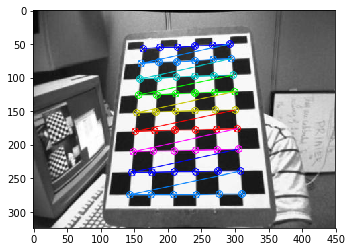

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
# prepare object points
nx = 6#TODO: enter the number of inside corners in x
ny = 9#TODO: enter the number of inside corners in y

# Make a list of calibration images
fname = 'Figures/9. calibration_test.png'
img = cv2.imread(fname)
print(np.shape(img))
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

### 1.4. Calibrating Camera (Exercise: Correcting for Distortion)<a name='Calibrating Camera'></a>

__Examples of Useful Code:__

Converting an image, imported by cv2 or the glob API, to grayscale:

```Python
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
```

Note: If we are reading in an image using __mpimg.imread()__ this will read in an __RGB__ image and we should convert to grayscale using _cv2.COLOR_RGB2GRAY_, but if we are using __cv2.imread()__ or the __glob API__, as happens in this video example, this will read in a __BGR__ image and we should convert to grayscale using _cv2.COLOR_BGR2GRAY_. We'll learn more about color conversions later on in this lesson, but please keep this in mind as we write our own code and look at code examples.

Finding chessboard corners (for an 8x6 board):
```Python
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
```

Drawing detected corners on an image:
```Python
img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
```

Camera calibration, given object points, image points, and the __shape of the grayscale image__:
```Python
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
```

Undistorting a test image:
```Python
dst = cv2.undistort(img, mtx, dist, None, mtx)
```

---
__Note: image shape__
The shape of the image, which is passed into the __calibrateCamera function__, is just the height and width of the image. One way to retrieve these values is by retrieving them from the __grayscale image shape__ array gray.shape[::-1]. This returns the image height and width in pixel values like (960, 1280).

Another way to retrieve the image shape, is to get them directly from the color image by retrieving the first two values in the color image shape array using __img.shape[0:2]__. This code snippet asks for just the first two values in the shape array.

It's important to use an entire grayscale image shape or the first two values of a color image shape. This is because the entire shape of a color image will include a third value -- the number of color channels -- in addition to the height and width of the image. For example the shape array of a color image might be (960, 1280, 3), which are the pixel height and width of an image (960, 1280) and a third value (3) that represents the three color channels in the color image which you'll learn more about later, and if you try to pass these three values into the __calibrateCamera function__, you'll get an error.

---
Here, we'll get a chance to try camera calibration and distortion correction for ourself!

<img src='Figures/11. orig-and-undist.png' width=700>

There are two main steps to this process: use chessboard images to image points and object points, and then use the OpenCV functions __cv2.calibrateCamera()__ and __cv2.undistort()__ to compute the calibration and undistortion.

Unfortunately, we can't perform the extraction of object points and image points in the browser quiz editor, so we provide these for you in the quiz below.

Try computing the calibration and undistortion in the exercise below, and if you want to play with extracting object points and image points yourself, fork the Jupyter notebook and images in this repository.

If you run into any errors as you run your code, please refer to the Examples of Useful Code section in the previous video and make sure that your code syntax matches up!

In [9]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt5
#%matplotlib inline
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('Figures/calibration_wide/GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

__Note: ImportError: No module named 'PyQt4'__
https://github.com/ContinuumIO/anaconda-issues/issues/138

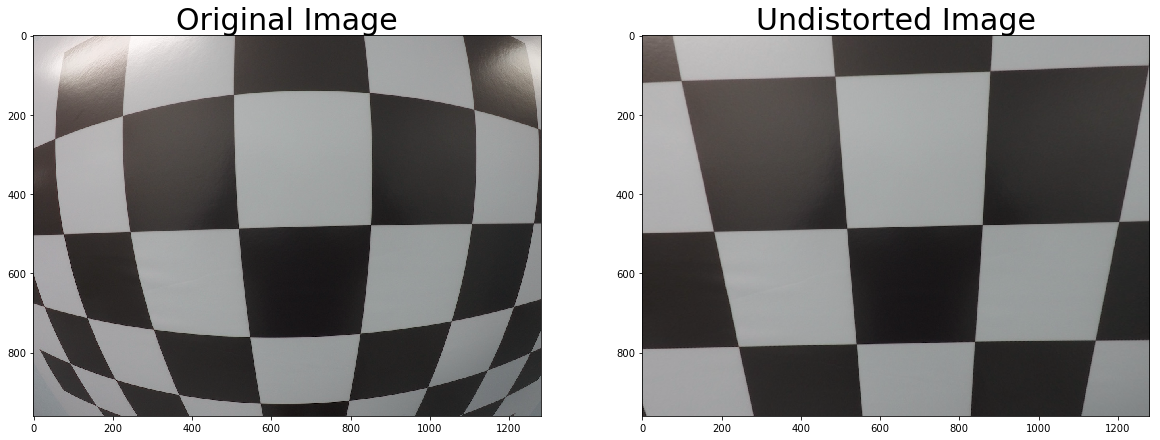

In [8]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('Figures/calibration_wide/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "Figures/calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

# 2. Lane Curvature <a name='Lane Curvature'></a>

### 2.1. Calculating Lane Curvature

Self-driving cars need to be told the correct steering angle to turn, left or right. You can calculate this angle if you know a few things about the speed and dynamics of the car and how much the lane is curving.

One way to calculate the curvature of a lane line, is to fit a 2nd degree polynomial to that line, and from this you can easily extract useful information.

For a lane line that is close to vertical, you can fit a line using this formula: $f(y) = Ay^2 + By + C$, where $A$, $B$, and $C$ are coefficients.

$A$ gives the curvature of the lane line, $B$ gives the heading or direction that the line is pointing, and $C$ gives the position of the line based on how far away it is from the very left of an image ($y = 0$).

### 2.2. Perspective Transform

A perspective transform maps the points in a given image to different, desired, image points with a new perspective. The perspective transform you’ll be most interested in is a bird’s-eye view transform that let’s us view a lane from above; this will be useful for calculating the lane curvature later on. Aside from creating a bird’s eye view representation of an image, a perspective transform can also be used for all kinds of different view points.

Compute the perspective transform, M, given source and destination points:
```Python
M = cv2.getPerspectiveTransform(src, dst)
```

Compute the inverse perspective transform:
```Python
Minv = cv2.getPerspectiveTransform(dst, src)
```

Warp an image using the perspective transform, M:
```Python
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
```

Note: When you apply a perspective transform, choosing four source points manually, as we did in this video, is often not the best option. There are many other ways to select source points. For example, many perspective transform algorithms will programmatically detect four source points in an image based on edge or corner detection and analyzing attributes like color and surrounding pixels.

```Python
# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients
def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M
```

__Output:__
<img src='Figures/18. undist-and-warp.png' width=500>

### 2.3. Gradient Threshold (Sobel Operator)

The Sobel operator is at the heart of the Canny edge detection algorithm we used in the Introductory Lesson. Applying the Sobel operator to an image is a way of taking the derivative of the image in the $x$ or $y$ direction. The operators for $\text{Sobel_x}$ and $\text{Sobel_y}$, respectively, look like this:

<img src='Figures/20. soble-operator.png' width=200>

These are examples of Sobel operators with a kernel size of 3 (implying a $3 \times 3$ operator in each case). This is the minimum size, but the kernel size can be any odd number. A larger kernel implies taking the gradient over a larger region of the image, or, in other words, a smoother gradient.

To understand how these operators take the derivative, we can think of overlaying either one on a $3 \times 3$ region of an image. If the image is flat across that region, then the result (summing the element-wise product of the operator and corresponding image pixels) will be zero. If, instead, for example, we apply the $S_x$ operator to a region of the image where values are rising from left to right, then the result will be positive, implying a positive derivative.

#### Example:
If we apply the Sobel x and y operators to this image:

<img src='Figures/20. curved-lane.jpg' width=500>

And then we take the absolute value, we get the result:

<img src='Figures/20. Acsolute value of Sobel.png' width=500>
$$\text{Absolute value of Sobel x (left) and Sobel y (right).}$$

#### $x$ vs. $y$
In the above images, we can see that the gradients taken in both the $x$ and the $y$ directions detect the lane lines and pick up other edges. Taking the gradient in the x direction emphasizes edges closer to vertical. Alternatively, taking the gradient in the y direction emphasizes edges closer to horizontal.

In the upcoming exercises, we'll write functions to take various thresholds of the $x$ and $y$ gradients. Here's some code that might be useful:

- We need to pass a single color channel to the cv2.Sobel() function, so first convert it to grayscale:
```Python
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
```

__Note:__ Make sure we use the correct grayscale conversion depending on how we've read in our images. Use __cv2.COLOR_RGB2GRAY__ if we've read in an image using __mpimg.imread()__. Use __cv2.COLOR_BGR2GRAY__ if we've read in an image using __cv2.imread()__.

Calculate the derivative in the $x$ direction (the 1, 0 at the end denotes $x$ direction):
```Python
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
```

Calculate the derivative in the $y$ direction (the 0, 1 at the end denotes $y$ direction):
```Python
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
```

Calculate the absolute value of the $x$ derivative:
```Python
abs_sobelx = np.absolute(sobelx)
```

Convert the absolute value image to 8-bit:
```Python
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
```

__Note:__ It's not entirely necessary to convert to 8-bit (range from 0 to 255) but in practice, it can be useful in the event that we've written a function to apply a particular threshold, and we want it to work the same on input images of different scales, like jpg vs. png. We could just as well choose a different standard range of values, like 0 to 1 etc.

Create a binary threshold to select pixels based on gradient strength:
```Python
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')
```

__Result:__
<img src='Figures/20. sobelx-binary.jpg' width=500>
$$\text{Pixels have a value of 1 or 0 based on the strength of the x gradient.}$$

---
Here's a chance to write a function that will be useful for the Advanced Lane-Finding Project at the end of this lesson! The goal in this exercise is to identify pixels where the gradient of an image falls within a specified threshold range.

__Example:__
<img src='Figures/21. thresh-x-example.png' width=500>

Here's the scaffolding for your function:
```Python
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Grayscale
    # Apply cv2.Sobel()
    # Take the absolute value of the output from cv2.Sobel()
    # Scale the result to an 8-bit range (0-255)
    # Apply lower and upper thresholds
    # Create binary_output
    return binary_output
```

Pass in __img__ and set the parameter __orient__ as __'x'__ or __'y'__ to take either the $x$ or $y$ gradient. Set __min_thresh__, and __max_thresh__ to specify the range to select for binary output. We can use exclusive (__<, >__) or inclusive (__<=, >=__) thresholding.

__NOTE:__ The output should be an array of the same size as the input image. The output array elements should be __1__ where gradients were in the threshold range, and __0__ everywhere else.

As usual, if we run into any _errors_ as we run our code, please refer to the __Examples of Useful Code section__ in the previous video and make sure that our code syntax matches up!

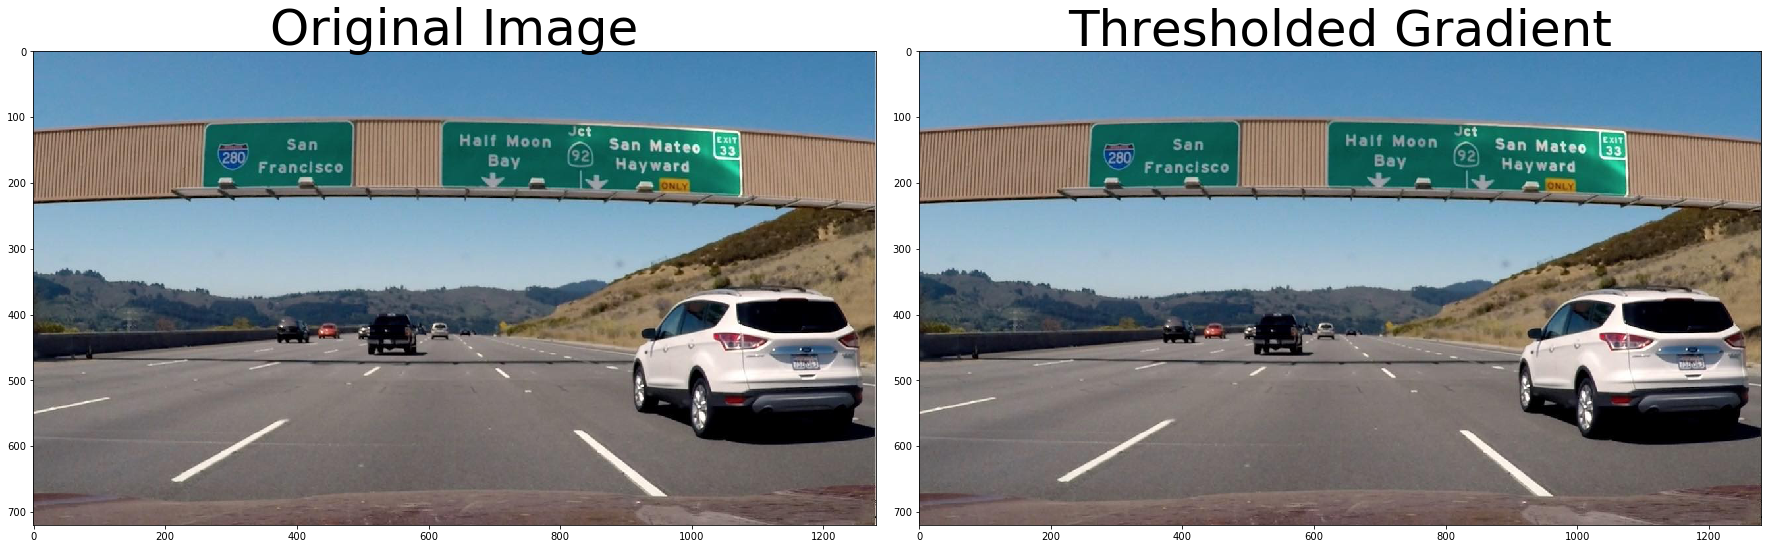

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('Figures/signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

__Answer:__
```Python
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output
```

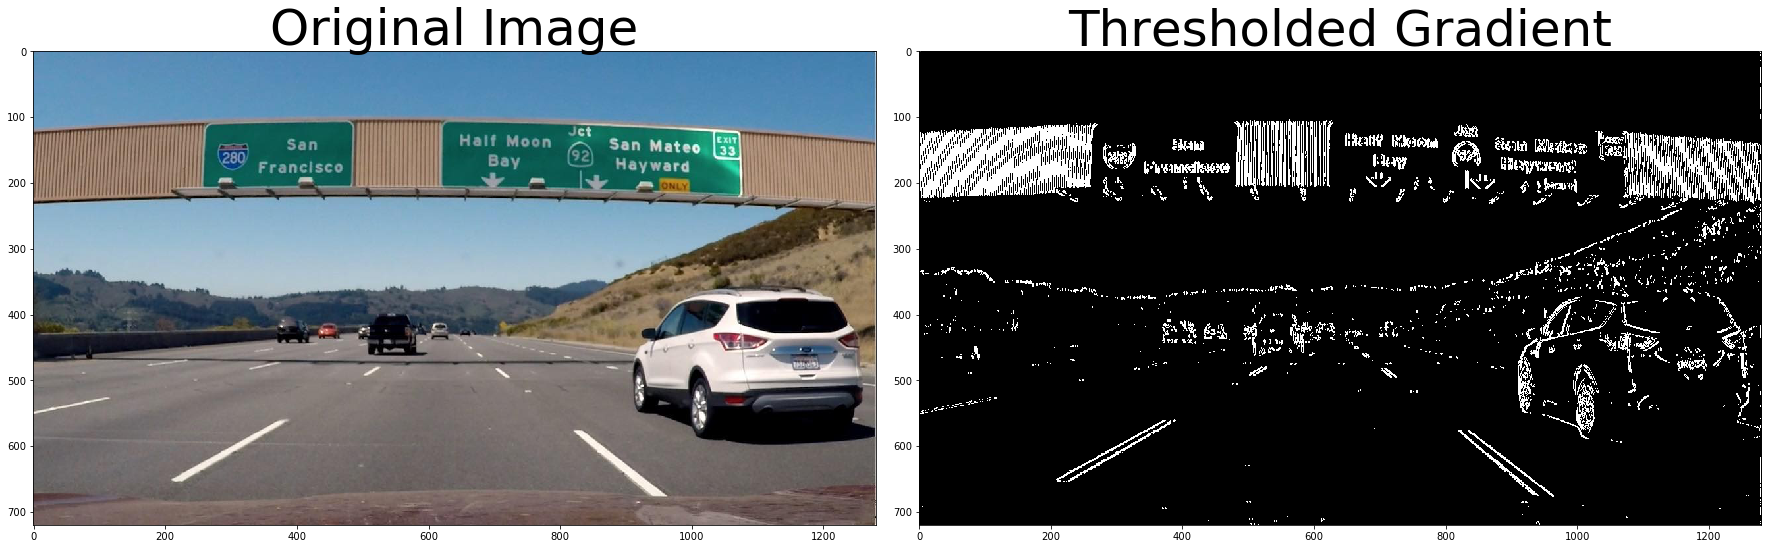

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('Figures/signs_vehicles_xygrad.png')


# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 2.4. Magnitude of the Gradient

<img src='Figures/22. mag-binary.jpg' width = 500>

With the result of the last quiz, we can now take the gradient in $x$ or $y$ and set thresholds to identify pixels within a certain gradient range. If we play around with the thresholds a bit, we'll find the x-gradient does a cleaner job of picking up the lane lines, but we can see the lines in the y-gradient as well.

In this next exercise, the goal is to apply a threshold to the overall magnitude of the gradient, in both $x$ and $y$.

The magnitude, or absolute value, of the gradient is just the square root of the squares of the individual $x$ and $y$ gradients. For a gradient in both the $x$ and $y$ directions, the magnitude is the square root of the sum of the squares.

$$
\begin{align}
\text{abs_sobelx}&=\sqrt{(\text{sobel}_x)^2}\\
\text{abs_sobely}&=\sqrt{(\text{sobel}_y)^2}\\
\text{abs_sobelx}&=\sqrt{(\text{sobel}_x)^2 + (\text{sobel}_y)^2}
\end{align}
$$

It's also worth considering the size of the region in the image over which we'll be taking the gradient. We can modify the kernel size for the Sobel operator to change the size of this region. Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. The default Sobel kernel size is 3, but here we'll define a new function that takes kernel size as a parameter (must be an odd number!)

The function we'll define for the exercise below should take in an image and optional Sobel kernel size, as well as thresholds for gradient magnitude. Next, we'll compute the gradient magnitude, apply a threshold, and create a binary output image showing where thresholds were met.

__Steps to take in this exercise:__
1. Fill out the function in the editor below to return a thresholded gradient magnitude. Again, we can apply exclusive (__<, >__) or inclusive (__<=, >=__) thresholds.
2. Test that the function returns output similar to the example below for __sobel_kernel=9, mag_thresh=(30, 100)__.

<img src='Figures/22. thresh-mag-example.png' width=500>

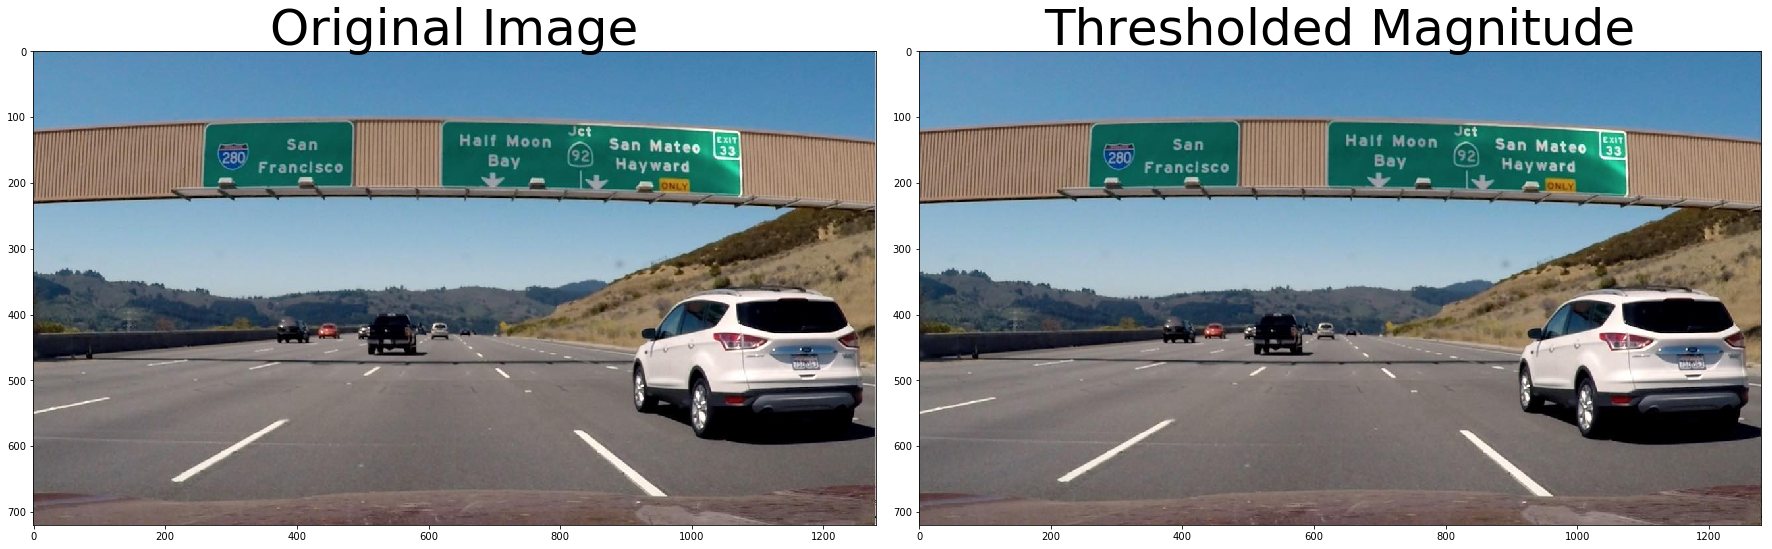

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('Figures/signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Calculate the magnitude 
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # 5) Create a binary mask where mag thresholds are met
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

__Answer:__
```Python
# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output
```

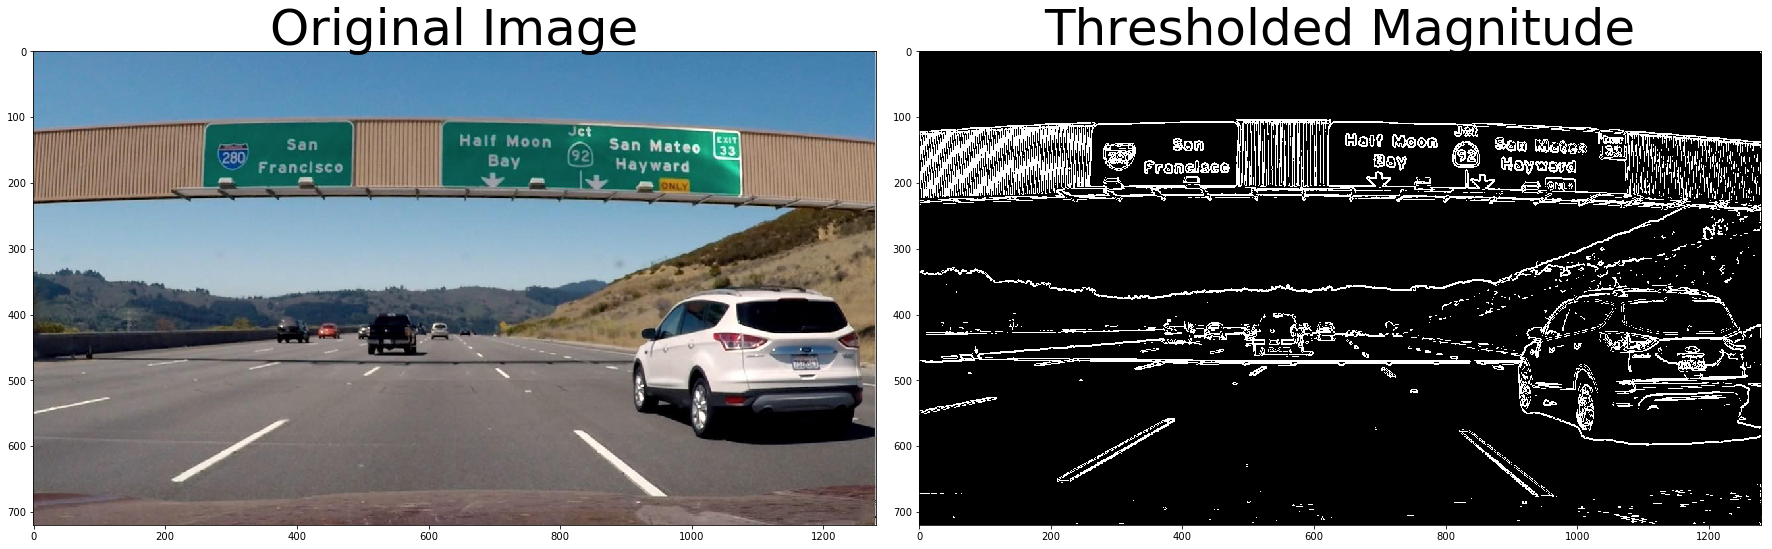

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('Figures/signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 2.5. Direction of the Gradient
When we play around with the thresholding for the gradient magnitude in the previous exercise, we find what we might expect, namely, that it picks up the lane lines well, but with a lot of other stuff detected too. Gradient magnitude is at the heart of Canny edge detection, and is why Canny works well for picking up all edges.

In the case of lane lines, we're interested only in edges of a particular orientation. So now we will explore the direction, or orientation, of the gradient.

The direction of the gradient is simply the inverse tangent (arctangent) of the $y$ gradient divided by the $x$ gradient:

$$\arctan(\text{sobel}_y/\text{sobel}_x)$$

Each pixel of the resulting image contains a value for the angle of the gradient away from horizontal in units of radians, covering a range of $−\pi/2$ to $\pi/2$. An orientation of 0 implies a horizontal line and orientations of $+/−\pi/2$ imply vertical lines.

In this next exercise, we'll write a function to compute the direction of the gradient and apply a threshold. The direction of the gradient is much noisier than the gradient magnitude, but we should find that we can pick out particular features by orientation.

__Steps to take in this exercise:__
- Fill out the function in the editor below to return a thresholded absolute value of the gradient direction. Use Boolean operators, again with exclusive (__<, >__) or inclusive (__<=, >=__) thresholds.
- Test that the function returns output similar to the example below for __sobel_kernel=15, thresh=(0.7, 1.3)__.

<img src='Figures/23. thresh-grad-dir-example.jpg' width=500>

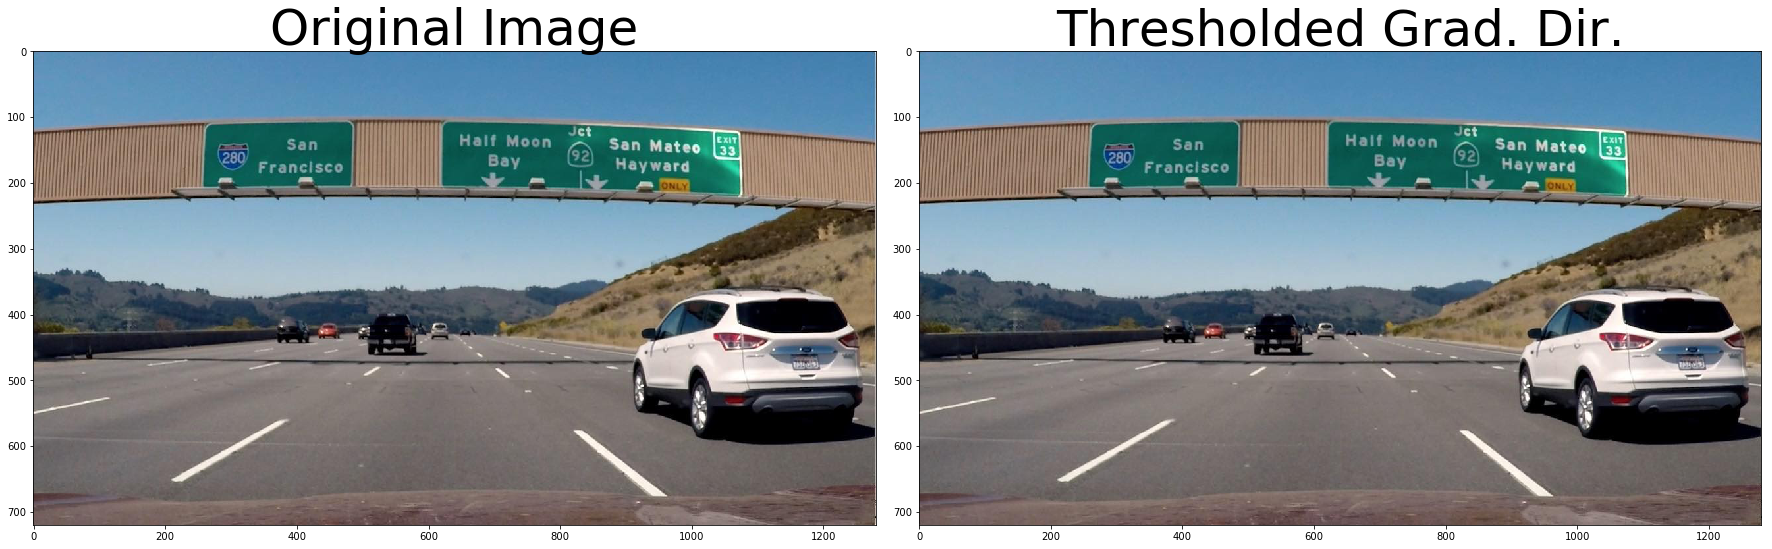

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('Figures/signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

__Answer:__
```Python
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output
```

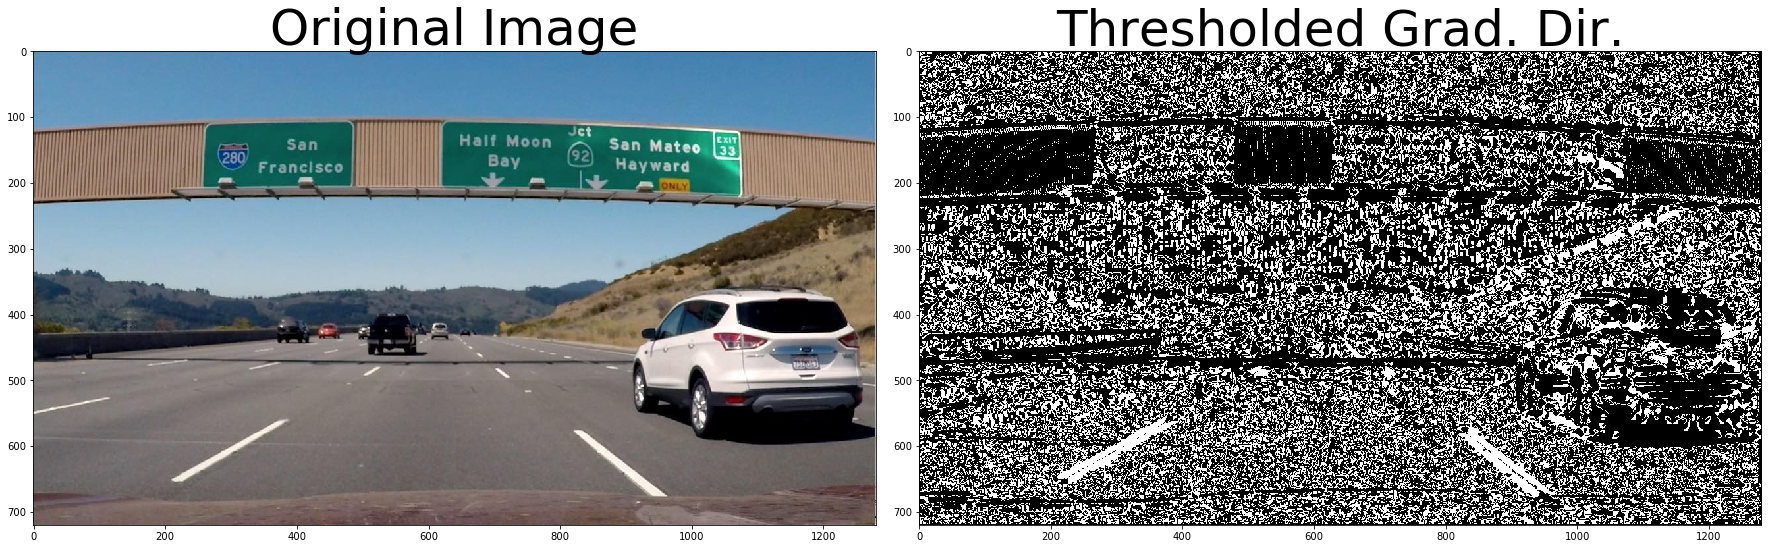

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('Figures/signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 2.6. Combining Thresholds
If we play around with the thresholds in the last exercise, we'll find that we can start to identify the lane lines by gradient direction alone by setting the threshold around __thresh = (0.7, 1.3)__, but there's still a lot of noise in the resulting image.

Now consider how we can use various aspects of our gradient measurements (x, y, magnitude, direction) to isolate lane-line pixels. Specifically, think about how we can use thresholds of the x and y gradients, the overall gradient magnitude, and the gradient direction to focus on pixels that are likely to be part of the lane lines.

__Challenge:__
In the project at the end of this section, we'll want to experiment with thresholding various aspects of the gradient, so now would be a great time to start coding it up on our local machine! Grab the image we've been working with for the last three quizzes here (or a smaller jpg file here).

Combine the selection thresholds from the last 3 quizzes to write a piece of code like the following, where you can play with various thresholds and see the output.

```Python
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    return dir_binary

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(0, 255))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(0, 255))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(0, 255))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/2))
```

Try different combinations and see what we get.

For example, here is a selection for pixels where both the x and y gradients meet the threshold criteria, or the gradient magnitude and direction are both within their threshold values.

```Python
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
```

__Output:__
Here is an example of a binary result from multiple thresholds:
<img src='Figures/24. binary-combo-example.jpg' width=500>

### 2.7. Colour Thresholding

A __color space__ is a specific organization of colors; color spaces provide a way to categorize colors and represent them in digital images.

__RGB__ is red-green-blue color space. You can think of this as a 3D space, in this case a cube, where any color can be represented by a 3D coordinate of R, G, and B values. For example, white has the coordinate (255, 255, 255), which has the maximum value for red, green, and blue.

Note: If you read in an image using __matplotlib.image.imread()__ we will get an RGB image, but if we read it in using OpenCV __cv2.imread()__ this will give you a BGR image.
<img src='Figures/25. RGB colour space.png' width=300>
$$ \text{RGB colour space} $$

There are many other ways to represent the colors in an image besides just composed of red, green, and blue values.

There is also __HSV__ color space (hue, saturation, and value), and __HLS__ space (hue, lightness, and saturation). These are some of the most commonly used color spaces in image analysis.

To get some intuition about these color spaces, we can generally think of __Hue__ as the value that represents color independent of any change in brightness. So if we imagine a basic red paint color, then add some white to it or some black to make that color lighter or darker -- the underlying color remains the same and the hue for all of these colors will be the same.

On the other hand, __Lightness__ and __Value__ represent different ways to measure the relative lightness or darkness of a color. For example, a dark red will have a similar hue but much lower value for lightness than a light red. __Saturation__ also plays a part in this; saturation is a measurement of colorfulness. So, as colors get lighter and closer to white, they have a lower saturation value, whereas colors that are the most intense, like a bright primary color (imagine a bright red, blue, or yellow), have a high saturation value. You can get a better idea of these values by looking at the 3D color spaces pictured below.

Most of these different color spaces were either inspired by the human vision system, and/or developed for efficient use in television screen displays and computer graphics. You can read more about the history and the derivation of HLS and HSV color spaces [here](https://en.wikipedia.org/wiki/HSL_and_HSV).

<img src='Figures/25. (Left) HSV color space, (Right) HLS color space.png' width=500>
$$ \text{(Left) HSV color space, (Right) HLS color space} $$

In the code example, we used HLS space to help detect lane lines of different colors and under different lighting conditions.

OpenCV provides a function __hls = cv2.cvtColor(im, cv2.COLOR_RGB2HLS)__ that converts images from one color space to another. If you’re interested in the math behind this conversion, take a look at the equations below; note that all this math is for converting 8-bit images, which is the format for most road images in this course. These equations convert one color at a time from RGB to HLS.

__Constants__
$$
\begin{align}
V_{max} & \leftarrow max(R,G,B) \\
V_{min} & \leftarrow min(R,G,B)
\end{align}
$$

These are the maximum and minimum values across all three RGB values for a given color.

__H channel conversion equations__
There are three different equations, which one is used depends on the the value of $V_{max}$ whether that's R, G, or B.
$$
\begin{align}
H &\leftarrow \frac{30(G-B)}{V_{max}-V_{min}}, \text{if } V_{max} = R \\
H &\leftarrow 60 + \frac{30(B-R)}{V_{max}-V_{min}}, \text{if } V_{max} = G \\
H &\leftarrow 120 + \frac{30(R-G)}{V_{max}-V_{min}}, \text{if } V_{max} = B \\
\end{align}
$$

__Note:__ In OpenCV, for 8-bit images, the range of H is from 0-179. It's typically from 0-359 for degrees around the cylindrical colorspace, but this number is divided in half so that the range can be represented in an 8-bit image whose color values range from 0-255.

__L channel conversion equation__
$$
L \leftarrow \frac{V_{max} + V_{min}}{2}
$$

__S channel conversion equations__

There are two possible equations; one is used depending on the value of L.
$$
\begin{align}
S &\leftarrow \frac{V_{max} - V_{min}}{V_{max} + V_{min}}, \text{if } L <0.5\\
S &\leftarrow \frac{V_{max} - V_{min}}{2 - (V_{max} + V_{min})}, \text{if } L \ge 0.5
\end{align}
$$

---
We've now seen that various color thresholds can be applied to find the lane lines in images. Here we'll explore this a bit further and look at a couple examples to see why a color space like HLS can be more robust. Let's first take another look at some of the images we saw in the last video.

<img src='Figures/26. test6.jpg' width=500>

Here we'll read in the same original image (the image above), convert to grayscale, and apply a threshold that identifies the lines:

```Python
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('test6.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1
```

And here's the result:
<img src='Figures/26. test6gray.jpg' width=500>

We might have also explored thresholding individual RGB color channels. We can take a look at them side by side to see which ones do a better job of picking up the lane lines:
```Python
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
```

<img src='Figures/26. test6rgb.jpg' width=500>

The R channel does a reasonable job of highlighting the lines, and we can apply a similar threshold to find lane-line pixels:
```Python
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1
```

<img src='Figures/26. test6r-channel.jpg' width=500>

In this lesson, we're looking at different color spaces. While there are several that are worth exploring, here we'll look specifically at HLS. When we separate the H, L, and S channels we get the following result:
```Python
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
```

<img src='Figures/26. test6hls.jpg' width=500>

The S channel picks up the lines well, so let's try applying a threshold there:
```Python
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1
```

<img src='Figures/26. test6s-channel.jpg' width=500>

We can also see that in the H channel, the lane lines appear dark, so we could try a low threshold there and obtain the following result:
```Python
thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1
```

<img src='Figures/26. test6h-channel.jpg' width=500>

From these examples, we can see that the S channel is probably our best bet. It's cleaner than the H channel result and a bit better than the R channel or simple grayscaling. But it's not clear that one method is far superior to the others.

In each case, we've tweaked the threshold parameters to do as good a job as possible of picking out the lines. Where we can really see a difference in results, however, is when we step to a new frame, where there are shadows and different colors in the pavement.

Look at the same thresholds applied to each of these four channels for this image:

<img src='Figures/26. test4.jpg' width=500>

Here's how the various channels and binaries (with the same threshold values as above) look:

<img src='Figures/26. test4gray.jpg' width=500>
<img src='Figures/26. test4r-channel.jpg' width=500>
<img src='Figures/26. test4s-channel.jpg' width=500>
<img src='Figures/26. test4h-channel.jpg' width=500>

Now you can see that, the S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy. We could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.

It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how we might combine various color thresholds to make the most robust identification of the lines.

### 2.8. HLS Colour Threshold

<img src='Figures/27. hls-binary.jpg' width=500>

In this exercise, we can try applying a color threshold in the HLS color space. If we have any problems with the implementation, please refer to the previous video and instructor notes.

The task here is to write a function that takes in an image and threshold values and returns a binary output from applying the threshold to the S-channel. Apply thresholds as we did for gradients but this time use an exclusive (__>__) lower bound and an inclusive upper bound (__<=__).

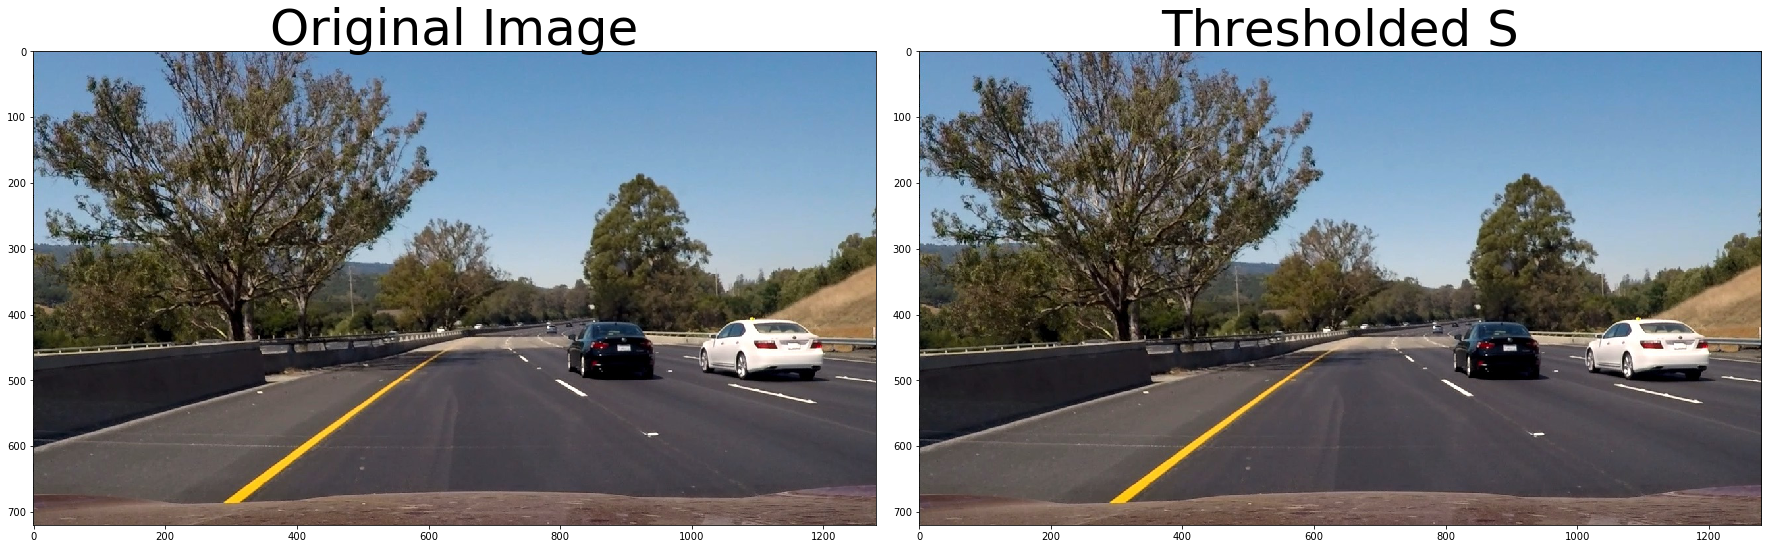

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import cv2

# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('Figures/26. test6.jpg') 

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    # 2) Apply a threshold to the S channel
    # 3) Return a binary image of threshold result
    binary_output = np.copy(img) # placeholder line
    return binary_output
    
hls_binary = hls_select(image, thresh=(0, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

__Answer:__
```Python
# Define a function that thresholds the S-channel of HLS
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

hls_binary = hls_select(image, thresh=(90, 255))
```

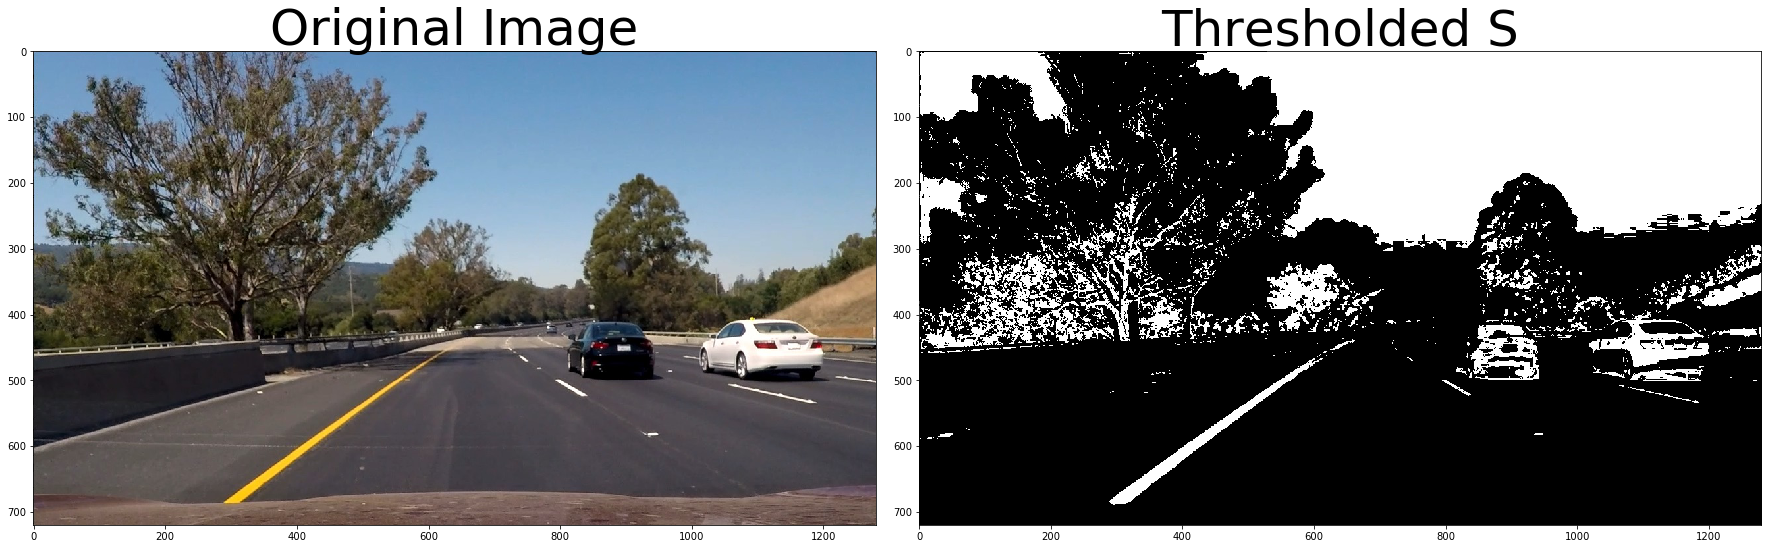

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import cv2

# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('Figures/26. test6.jpg') 

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

hls_binary = hls_select(image, thresh=(90, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 2.9. Color and Gradient

Now it's time to combine what we know about color and gradient thresholding to get the best of both worlds. Here's an example of how that might look:

<img src='Figures/28. Combined color and gradient thresholds for lane detection.png' width=500>
$$ \text{Combined color and gradient thresholds for lane detection} $$

At this point, it's okay to detect edges around trees or cars because these lines can be mostly filtered out by applying a mask to the image and essentially cropping out the area outside of the lane lines. It's most important that we reliably detect different colors of lane lines under varying degrees of daylight and shadow.

We can clearly see which parts of the lane lines were detected by the gradient threshold and which parts were detected by the color threshold by stacking the channels and seeing the individual components. We can create a binary combination of these two images to map out where either the color or gradient thresholds were met.

Here's what that looks like in code:

```Python
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')
```

The output is shown below. The final image __color\_binary__ is a combination of binary thresholding the S channel (HLS) and binary thresholding the result of applying the Sobel operator in the x direction on the original image.

<img src='Figures/29. output.png' width=500>

(Left) Stacked image; the green is the gradient threshold component and the blue is the color channel threshold component. (Right) black and white combined thresholded image - this one has combined both gradient and color thresholds into one image.

In this next exercise, we'll get the chance to play around with different combinations of color and gradient with the goal using the pipeline we come up with for our upcoming project. There's no correct submission, just explore!

Some interesting things to explore might include: the H channel, different threshold values for color and gradient binary images, and even a different color space, like HSV!

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image = mpimg.imread('Figures/26. test6.jpg')

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    return color_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# 3. Lane Finding Steps

### 3.1. Processing Each Image

<img src='Figures/30. color-shadow-example.jpg' width=500>

In the project at the end of this module, the first thing we'll do is to compute the camera calibration matrix and distortion coefficients. We only need to compute these once, and then we'll apply them to undistort each new frame. Next, we'll apply thresholds to create a binary image and then apply a perspective transform.

#### 3.1.1. Thresholding
We'll want to try out various combinations of color and gradient thresholds to generate a binary image where the lane lines are clearly visible. There's more than one way to achieve a good result, but for example, given the image above, the output we're going for should look something like this:

<img src='Figures/30. binary-combo-img.jpg' width=500>

#### 3.1.2. Perspective Transform
Next, we want to identify four source points for our perspective transform. In this case, we can assume the road is a flat plane. This isn't strictly true, but it can serve as an approximation for this project. We would like to pick four points in a trapezoidal shape (similar to region masking) that would represent a rectangle when looking down on the road from above.

The easiest way to do this is to investigate an image where the lane lines are straight, and find four points lying along the lines that, after perspective transform, make the lines look straight and vertical from a bird's eye view perspective.

<img src='Figures/30. warped-straight-lines.jpg' width=500>

#### 3.1.3. Now for curved lines
Those same four source points will now work to transform any image (again, under the assumption that the road is flat and the camera perspective hasn't changed). When applying the transform to new images, the test of whether or not we got the transform correct, is that the lane lines should appear parallel in the warped images, whether they are straight or curved.

Here's an example of applying a perspective transform to our thresholded binary image, using the same source and destination points as above, showing that the curved lines are (more or less) parallel in the transformed image:

<img src='Figures/30. warped-curved-lines.jpg' width=500>

### 3.2. Finding the Lines

#### 3.2.1. Locate the Lane Lines and Fit a Polynomial

<img src='Figures/31. warped-example.jpg' width=500>
$$ \text{Thresholded and perspective transformed image} $$

We now have a thresholded warped image and we're ready to map out the lane lines! There are many ways we could go about this, but here's one example of how you might do it:

__Line Finding Method: Peaks in a Histogram:__
After applying calibration, thresholding, and a perspective transform to a road image, we should have a binary image where the lane lines stand out clearly. However, we still need to decide explicitly which pixels are part of the lines and which belong to the left line and which belong to the right line.

We first take a __histogram__ along all the columns in the lower half of the image like this:
```Python
import numpy as np
histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
plt.plot(histogram)
```

The result looks like this:
<img src='Figures/31. Peaks in a Histogram.png' width=500>

#### 3.2.2. Sliding Window
With this histogram We are adding up the pixel values along each column in the image. In our thresholded binary image, pixels are either 0 or 1, so the two most prominent peaks in this histogram will be good indicators of the x-position of the base of the lane lines. We can use that as a starting point for where to search for the lines. From that point, we can use a sliding window, placed around the line centers, to find and follow the lines up to the top of the frame.

Here is a short animation showing this method:
이미지 추가하기

#### 3.2.3. Implement Sliding Windows and Fit a Polynomial
Suppose we've got a warped binary image called __binary_warped__ and we want to find which "hot" pixels are associated with the lane lines. Here's a basic implementation of the method shown in the figures above. We should think about how we could improve this implementation to make sure we can find the lines as robustly as possible!

```Python
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
```

#### 3.2.4. Visualisation

At this point, we're done! But here is how we can visualize the result as well:
```Python
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
```

The output should look something like this:
<img src='Figures/31. Visualisation.png' width=500>

#### 3.2.5. Skip the sliding windows step once we know where the lines are

Now we know where the lines are we have a fit! In the next frame of video we don't need to do a blind search again, but instead we can just search in a margin around the previous line position like this:

```Python
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
```

#### 3.2.6. And we're done! But let's visualize the result here as well

```Python
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
```

#### 3.2.7. And the output should look something like this:

<img src='Figures/31. And the output.png' width=500>

The green shaded area shows where we searched for the lines this time. So, once we know where the lines are in one frame of video, we can do a highly targeted search for them in the next frame. This is equivalent to using a customized region of interest for each frame of video, and should help we track the lanes through sharp curves and tricky conditions. If we lose track of the lines, go back to our sliding windows search or other method to rediscover them.

### 3.3. Sliding Window Search
Another way to approach the sliding window method is to apply a convolution, which will maximize the number of "hot" pixels in each window. A convolution is the summation of the product of two separate signals, in our case the window template and the vertical slice of the pixel image.

We slide our window template across the image from left to right and any overlapping values are summed together, creating the convolved signal. The peak of the convolved signal is where there was the highest overlap of pixels and the most likely position for the lane marker.

Now let's try using convolutions to find the best window center positions in a thresholded road image. The code below allows us to experiment with using convolutions for a sliding window search function. Go ahead and give it a try.

<img src='Figures/32. window-result2.png' width=500>

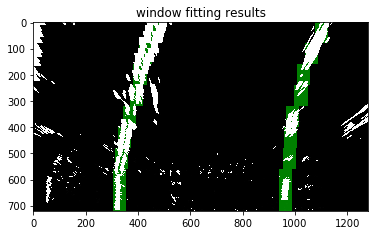

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2

# Read in a thresholded image
warped = mpimg.imread('Figures/31. warped-example.jpg')
# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(image, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(warped.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(warped.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):int(warped.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,warped.shape[1]))
        l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(max(r_center+offset-margin,0))
        r_max_index = int(min(r_center+offset+margin,warped.shape[1]))
        r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
        # Add what we found for that layer
        window_centroids.append((l_center,r_center))

    return window_centroids

window_centroids = find_window_centroids(warped, window_width, window_height, margin)

# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    # Go through each level and draw the windows
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
        # Add graphic points from window mask here to total pixels found 
        l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
        r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8) # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
 
# If no window centers found, just display orginal road image
else:
    output = np.array(cv2.merge((warped,warped,warped)),np.uint8)

# Display the final results
plt.imshow(output)
plt.title('window fitting results')
plt.show()


### 3.4. Measuring Curvature <a name='Measuring Curvature'></a>

We're getting very close to a final result! We have a thresholded image, where we've estimated which pixels belong to the left and right lane lines (shown in red and blue, respectively, below), and we've fit a polynomial to those pixel positions. Next we'll compute the radius of curvature of the fit.

<img src='Figures/35. color-fit-lines.jpg' width=500>
$$ \text{Here I have fit the left and right lines with a second order polynomial shown in green.} $$

In the last exercise, we located the lane line pixels, used their $x$ and $y$ pixel positions to fit a second order polynomial curve:
$$
f(y)=Ay^2 + By + C
$$

We're fitting for $f(y)$, rather than $f(x)$, because the lane lines in the warped image are near vertical and may have the same $x$ value for more than one $y$ value.

#### 3.4.1. Radius of Curvature
The radius of curvature ([awesome tutorial here](http://www.intmath.com/applications-differentiation/8-radius-curvature.php)) at any point $x$ of the function $x=f(y)$ is given as follows:

$$
R_{\text{curve}} = \frac{ [1+(\frac{dx}{dy})^2]^{3/2} }{\left| \frac{d^2 x}{dy^2} \right| }
$$

In the case of the second order polynomial above, the first and second derivatives are:

$$
\begin{align}
f'(y) &= \frac{dx}{dy} = 2Ay + B \\
f''(y) &= \frac{d^2 x}{dy^2} = 2A
\end{align}
$$

So, our equation for radius of curvature becomes:

$$
R_{\text{curve}} = \frac{ (1 + (2Ay+B)^2)^{3/2} }{\left| 2A \right|}
$$

The $y$ values of our image increase from top to bottom, so if, for example, we wanted to measure the radius of curvature closest to the vehicle, we could evaluate the formula above at the $y$ value corresponding to the bottom of our image, or in Python, at __yvalue = image.shape[0]__.

#### 3.4.2. Sample Implementation
```Python
import numpy as np
import matplotlib.pyplot as plt
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images
```

The output looks like this:

<img src='Figures/35. curvature.png' width=500>

Now we have polynomial fits and we can calculate the radius of curvature as follows:

```Python
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48
```

But now we need to stop and think... We've calculated the radius of curvature based on pixel values, so the radius we are reporting is in pixel space, which is not the same as real world space. So we actually need to repeat this calculation after converting our x and y values to real world space.

This involves measuring how long and wide the section of lane is that we're projecting in our warped image. We could do this in detail by measuring out the physical lane in the field of view of the camera, but for this project, you can assume that if you're projecting a section of lane similar to the images above, the lane is about 30 meters long and 3.7 meters wide. Or, if you prefer to derive a conversion from pixel space to world space in your own images, compare your images with U.S. regulations that require a minimum lane width of 12 feet or 3.7 meters, and the dashed lane lines are 10 feet or 3 meters long each.

So here's a way to repeat the calculation of radius of curvature after correcting for scale in x and y:
```Python
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m
```

Check out the [U.S. government specifications for highway curvature](http://onlinemanuals.txdot.gov/txdotmanuals/rdw/horizontal_alignment.htm#BGBHGEGC) to see how your numbers compare. There's no need to worry about absolute accuracy in this case, but our results should be "order of magnitude" correct.

### 3.3. Tips and Tricks for the Project

#### 3.3.1 Camera Calibration
The calibration images in the lesson exercise were taken with a different camera setting and a different chessboard pattern than the calibration images for the project. We need to set our chessboard size to 9x6 for the project instead of 8x6 as in the lesson.

#### 3.3.2 Do the curvature values make sense?
We're not expecting anything like perfection for this project, but a good check on whether or not our perspective transform worked as expected, our conversion from pixel space to world space was correct, and that we successfully calculated the radius of curvature is whether or not our results are roughly consistent with reality.

Here is an image from Google maps of where the project video was made (just northwest of the Udacity office!). Here, I've drawn a circle to coincide with the first left curve in the project video. This is a very rough estimate, but as we can see, the radius of that circle is approximately 1 km. we don't need to tune our algorithm to report exactly a radius of 1 km in the project, but if we're reporting 10 km or 0.1 km, we know there might be something wrong with our calculations!

<img src='Figures/36. curvature google map.png' width=500>

#### 3.3.3. Pipeline

__1) Offset:__

We can assume the camera is mounted at the center of the car, such that the lane center is the midpoint at the bottom of the image between the two lines we've detected. The offset of the lane center from the center of the image (converted from pixels to meters) is our distance from the center of the lane.

__2) Tracking:__

After we've tuned our pipeline on test images, we'll run on a video stream, just like in the first project. In this case, however, we're going to keep track of things like where our last several detections of the lane lines were and what the curvature was, so we can properly treat new detections. To do this, it's useful to define a __Line() class__ to keep track of all the interesting parameters we measure from frame to frame. Here's an example:

```Python
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
```

We can create an instance of the __Line() class__ for the left and right lane lines to keep track of recent detections and to perform sanity checks.

__3) Sanity Check:__

Ok, so our algorithm found some lines. Before moving on, we should check that the detection makes sense. To confirm that our detected lane lines are real, we might consider:

- Checking that they have similar curvature
- Checking that they are separated by approximately the right distance horizontally
- Checking that they are roughly parallel

__4) Look-Ahead Filter:__

Once we've found the lane lines in one frame of video, and we are reasonably confident they are actually the lines we are looking for, we don't need to search blindly in the next frame. We can simply search within a window around the previous detection.

For example, if we fit a polynomial, then for each $y$ position, we have an $x$ position that represents the lane center from the last frame. Search for the new line within +/- some margin around the old line center.

Double check the bottom of this cell here to remind ourself how this works.

Then check that our new line detections makes sense (i.e. expected curvature, separation, and slope).

__5) Reset:__

If our sanity checks reveal that the lane lines we've detected are problematic for some reason, we can simply assume it was a bad or difficult frame of video, retain the previous positions from the frame prior and step to the next frame to search again. If we lose the lines for several frames in a row, we should probably start searching from scratch using a histogram and sliding window, or another method, to re-establish our measurement.

__6) Smoothing:__

Even when everything is working, our line detections will jump around from frame to frame a bit and it can be preferable to smooth over the last $n$ frames of video to obtain a cleaner result. Each time we get a new high-confidence measurement, we can append it to the list of recent measurements and then take an average over $n$ past measurements to obtain the lane position you want to draw onto the image.

__ 7) Drawing:__

Once we have a good measurement of the line positions in warped space, it's time to project our measurement back down onto the road! Let's suppose, as in the previous example, we have a warped binary image called __warped__, and we have fit the lines with a polynomial and have arrays called __ploty__, __left_fitx__ and __right_fitx__, which represent the $x$ and $y$ pixel values of the lines. We can then project those lines onto the original image as follows:

```Python
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)
```

<img src='Figures/37. lane-drawn.jpg' width=500>
$$ \text{Original (undistorted) image with lane area drawn} $$